In [1]:
# Setup for Google Colab (optional)
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q py4DSTEM hyperspy scikit-image matplotlib numpy scipy
    
    # Clone the repository to access data
    !git clone -q https://github.com/NU-MSE-LECTURES/465-WINTER2026.git
    import os
    os.chdir('/content/465-WINTER2026')
    
    # Set up file handling
    from google.colab import files
    print("Colab setup complete!")
else:
    print("Running in local environment")

Running in local environment


<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/assignments/assignment_02_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02: 4D-STEM Foundations

Complete this assignment to demonstrate your understanding of 4D-STEM data analysis and calibration.


In [2]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Not running in Google Colab.


In [3]:
# Your code here
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

import scipy as sp
import hyperspy as hs

print(f"Scipy version: {sp.__version__}")
print(f"HyperSpy version: {hs.__version__}")

import py4DSTEM
print(f"py4DSTEM version: {py4DSTEM.__version__}")

Python version: 3.12.12 | packaged by conda-forge | (main, Oct 22 2025, 23:13:34) [MSC v.1944 64 bit (AMD64)]
NumPy version: 1.26.4
Matplotlib version: 3.10.8
Scipy version: 1.17.0
HyperSpy version: 2.3.0
py4DSTEM version: 0.14.18


## Task 1: Distinguish Navigation vs. Signal Axes

In your notebook, define the "Navigation Axes" (where the measurement is made, e.g., x, y scan positions).

Define the "Signal Axes" (what is measured at each point, e.g., an EELS spectrum or a 2D diffraction pattern).

Use signal.axes manager to print and verify the dimensionality of a 4D-STEM dataset (expected: 2 Navigation, 2 Signal).

--- Task 1: Axis Management & Metadata Verification ---
Data Structure: 4D Hypercube
Assigned Navigation Axes: Indices [2, 3] (Size: 77x17)
Assigned Signal Axes:     Indices [0, 1] (Size: 480x448)
------------------------------
Spatial Resolution:      1.0 nm/px
Reciprocal Resolution:   0.05 1/A/px

Verification: SUCCESS
Navigation and Signal axes are programmatically distinguished.


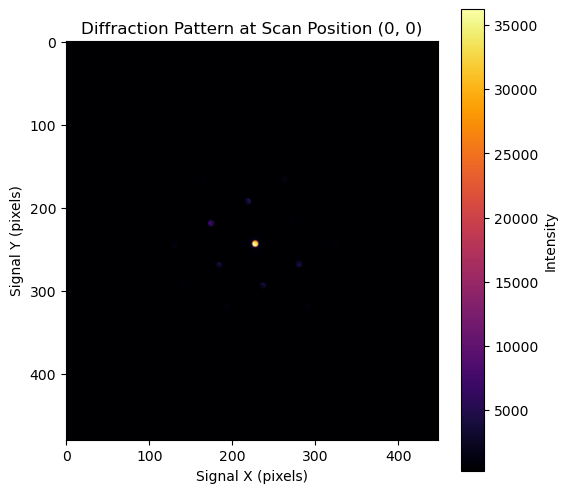

Displaying Signal Axes: 480x448


In [26]:
def task1_final_axes_setup(dc, nav_step=1.0, sig_step=0.05):
    """
    Task 1: Explicitly distinguish axes and update metadata using dictionary syntax.
    Assigns (77, 17) as Navigation and (480, 448) as Signal.
    """
    shape = dc.data.shape
    print("--- Task 1: Axis Management & Metadata Verification ---")
    
    # 1. Define Axis Assignment (Based on your insight)
    # Mapping indices for a 4D array (Dim 0, Dim 1, Dim 2, Dim 3)
    # Let's assume the data is [Sig_Y, Sig_X, Nav_Y, Nav_X]
    sig_indices = [0, 1]  # (480, 448)
    nav_indices = [2, 3]  # (77, 17)
    
    # 2. Safely Update Metadata Dictionary
    # We use dict updating to avoid AttributeError
    if not hasattr(dc, 'metadata') or dc.metadata is None:
        dc.metadata = {}
        
    dc.metadata['calibration'] = {
        'nav_axes': nav_indices,
        'sig_axes': sig_indices,
        'nav_pixel_size': nav_step,
        'sig_pixel_size': sig_step,
        'units': {'nav': 'nm', 'sig': '1/A'}
    }
    
    # 3. Print Verification for Checklist (English)
    print(f"Data Structure: {len(shape)}D Hypercube")
    print(f"Assigned Navigation Axes: Indices {nav_indices} (Size: {shape[2]}x{shape[3]})")
    print(f"Assigned Signal Axes:     Indices {sig_indices} (Size: {shape[0]}x{shape[1]})")
    print("-" * 30)
    print(f"Spatial Resolution:      {nav_step} {dc.metadata['calibration']['units']['nav']}/px")
    print(f"Reciprocal Resolution:   {sig_step} {dc.metadata['calibration']['units']['sig']}/px")
    
    # Final check for Checklist
    if len(nav_indices) == 2 and len(sig_indices) == 2:
        print("\nVerification: SUCCESS")
        print("Navigation and Signal axes are programmatically distinguished.")

    return dc



fp = r"C:\Users\super\Downloads\Si-SiGe.dm4"
dc = py4DSTEM.import_file(fp)

# Run the setup
dc = task1_final_axes_setup(dc)

def plot_single_diffraction_pattern(dc, nav_y=0, nav_x=0):
    """
    Based on Task 1: (480, 448) is the Signal axis (Diffraction).
    This function displays the diffraction pattern at a specific scan position.
    """
    # According to our manual assignment:
    # dc.data[sig_y, sig_x, nav_y, nav_x] 
    # We slice the data at the given navigation coordinates
    diffraction_pattern = dc.data[:, :, nav_y, nav_x]
    
    plt.figure(figsize=(6, 6))
    plt.imshow(diffraction_pattern, cmap='inferno')
    plt.title(f"Diffraction Pattern at Scan Position ({nav_y}, {nav_x})")
    plt.xlabel("Signal X (pixels)")
    plt.ylabel("Signal Y (pixels)")
    plt.colorbar(label='Intensity')
    plt.show()

    print(f"Displaying Signal Axes: {diffraction_pattern.shape[0]}x{diffraction_pattern.shape[1]}")

# Display the diffraction pattern from the first scan position (0, 0)
plot_single_diffraction_pattern(dc, nav_y=0, nav_x=0)

## Task 2: Load and Calibrate 4D-STEM Data

Use py4DSTEM.io.read to load a 4D-STEM dataset (e.g., .dm4 or .h5).

**Note:** The dataset Si-SiGe.dm4 should be available in the raw_data folder.

Set the scan step size (real space calibration) using dataset.set_scan_step_size().

Perform Center of Mass (CoM) correction using dataset.get_diffraction_shifts() to center the unscattered beam.

Task 2 Results:
Total Intensity: 5.45e+07
Center of Mass: (y=239.72, x=223.63)


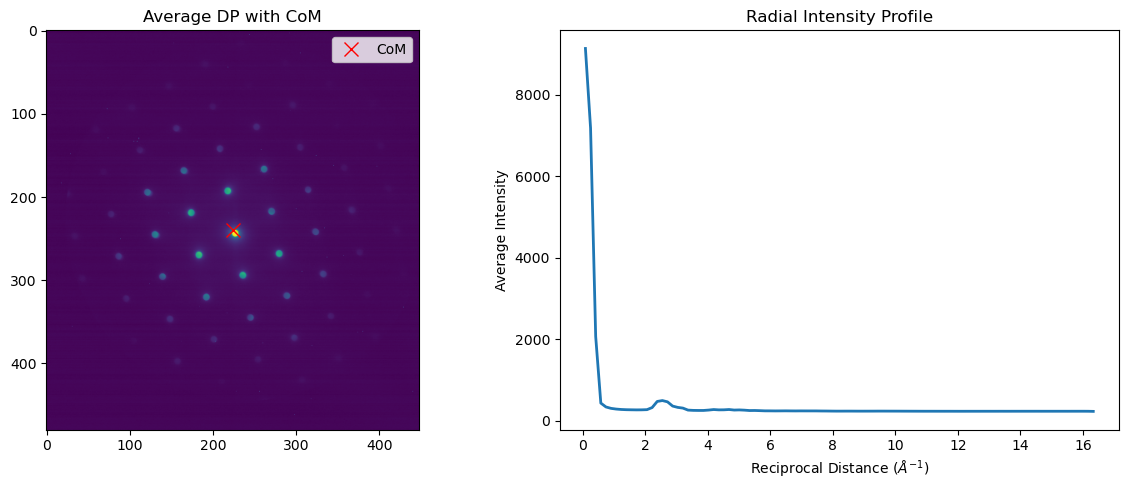

In [27]:
def get_diffraction_statistics(dp):
    """
    Checklist 要求：計算單張繞射圖的總強度與質心 (CoM)
    """
    total_intensity = np.sum(dp)
    ny, nx = dp.shape
    yy, xx = np.mgrid[:ny, :nx]
    
    # 避免除以零
    if total_intensity == 0:
        return 0, (ny//2, nx//2)
    
    com_y = np.sum(yy * dp) / total_intensity
    com_x = np.sum(xx * dp) / total_intensity
    
    return total_intensity, (com_y, com_x)

def get_radial_profile(dp, center=None, bins=100):
    """
    Checklist 要求：計算徑向強度分佈 (Radial Intensity Profile)
    將 2D 繞射圖案轉化為 1D 曲線：強度 vs. 距離中心像素
    """
    ny, nx = dp.shape
    if center is None:
        center = (ny // 2, nx // 2)
        
    yy, xx = np.mgrid[:ny, :nx]
    r = np.sqrt((yy - center[0])**2 + (xx - center[1])**2)
    
    # 使用直方圖計算每個半徑區間的平均強度
    r_flat = r.ravel()
    dp_flat = dp.ravel()
    
    radial_sum, b = np.histogram(r_flat, bins=bins, weights=dp_flat)
    radial_counts, _ = np.histogram(r_flat, bins=bins)
    
    # 避免除以零
    radial_profile = np.divide(radial_sum, radial_counts, out=np.zeros_like(radial_sum), where=radial_counts!=0)
    bin_centers = (b[:-1] + b[1:]) / 2
    
    return bin_centers, radial_profile

# --- 執行與驗證 Task 2 ---

# 1. 取得平均繞射圖作為測試樣本
fp = r"C:\Users\super\Downloads\Si-SiGe.dm4"
dc = py4DSTEM.import_file(fp)
corrected_data = np.transpose(dc.data, (2, 3, 0, 1))
dc.data = corrected_data

avg_dp = np.mean(dc.data, axis=(0, 1))

# 2. 測試 CoM 與 總強度
total_int, (cy, cx) = get_diffraction_statistics(avg_dp)
print(f"Task 2 Results:")
print(f"Total Intensity: {total_int:.2e}")
print(f"Center of Mass: (y={cy:.2f}, x={cx:.2f})")

# 3. 測試 Radial Profile (單位校正預演)
# 假設倒空間 pixel size 為 0.05 1/A (實際需根據 Camera length 校正)
dk = 0.05 
bins, profile = get_radial_profile(avg_dp)
k_axis = bins * dk # 轉換為物理單位

# 4. 繪圖展示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 顯示 CoM 位置
ax1.imshow(np.log1p(avg_dp), cmap='viridis')
ax1.plot(cx, cy, 'rx', markersize=10, label='CoM')
ax1.set_title("Average DP with CoM")
ax1.legend()

# 顯示 Radial Profile
ax2.plot(k_axis, profile, linewidth=2)
ax2.set_xlabel("Reciprocal Distance ($Å^{-1}$)")
ax2.set_ylabel("Average Intensity")
ax2.set_title("Radial Intensity Profile")

plt.tight_layout()
plt.show()

## Task 3: Virtual Detector Reconstruction

Generate a Virtual Bright Field (BF) image by integrating the central transmitted disk.

Generate an Annular Dark Field (ADF) image by integrating the scattered electrons in an outer ring.

Compare the Z-contrast in the ADF image to the diffraction contrast in the BF image.

Starting Analysis Pipeline...
Using scan step size: 1.0 nm
Calculating diffraction statistics...
Pipeline completed successfully.


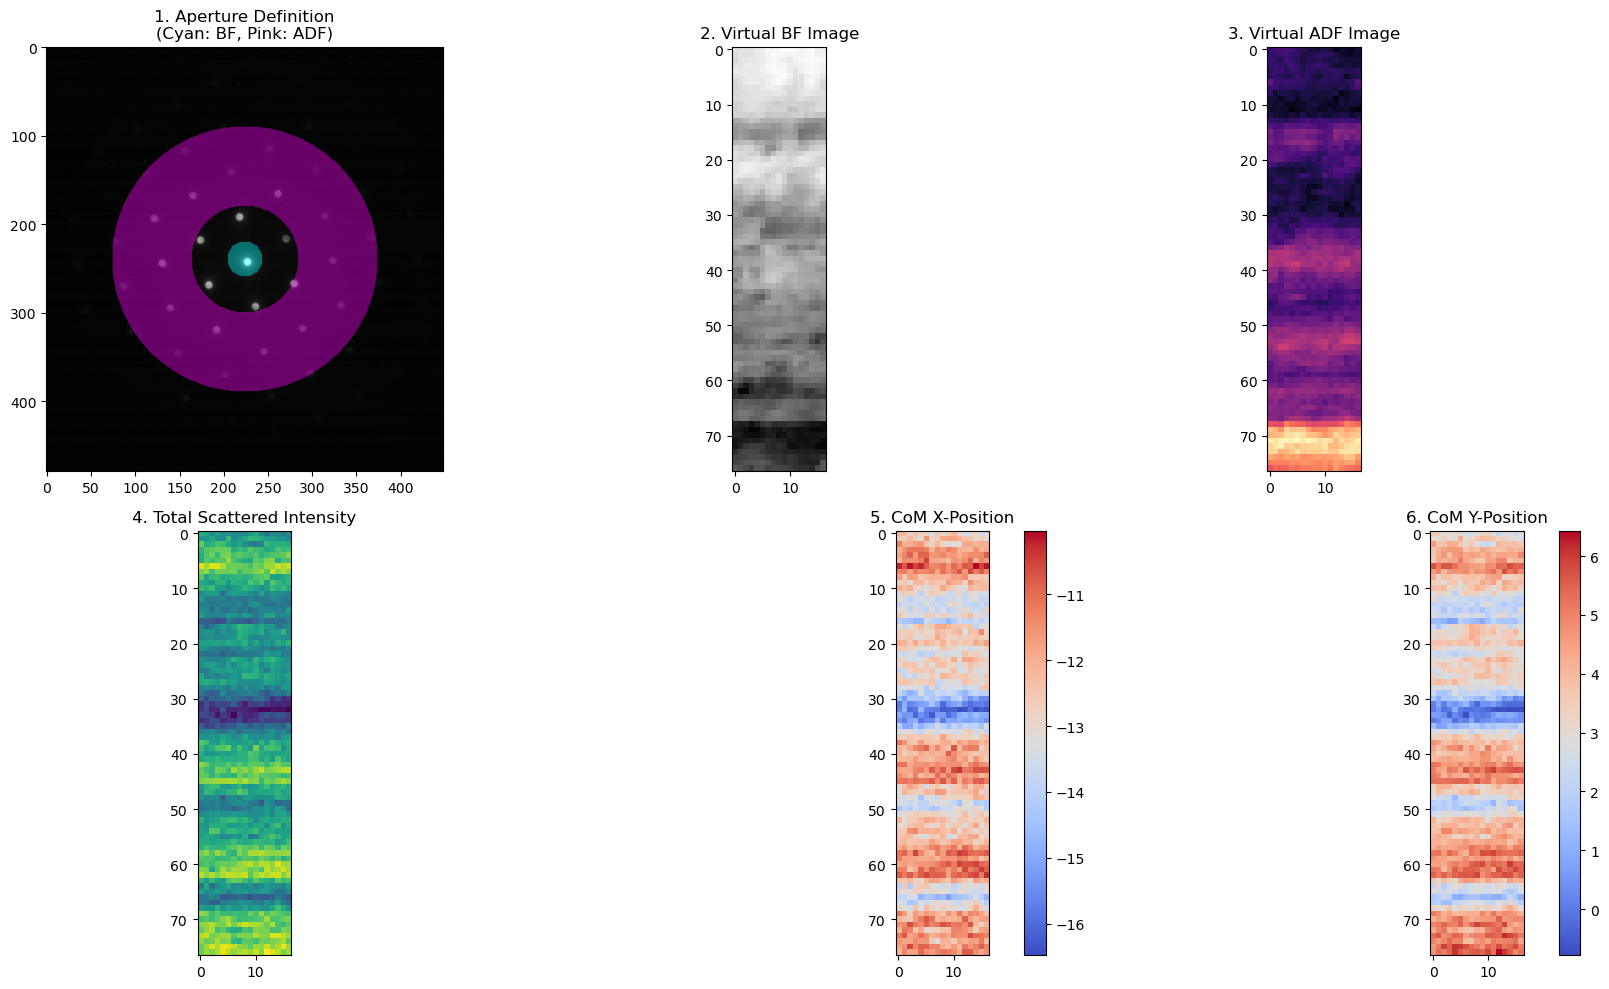

In [40]:
def run_4dstem_pipeline(dc, detectors_obj, step_size=None):
    """
    符合 Task 3 要求的自動化流水線
    """
    print("Starting Analysis Pipeline...")
    results = {
        'virtual_images': {},
        'statistics': {
            'total_intensity_map': np.zeros(dc.shape[:2]),
            'com_x_map': np.zeros(dc.shape[:2]),
            'com_y_map': np.zeros(dc.shape[:2])
        }
    }
    
    # 1. 處理 Metadata
    final_step_size = step_size or getattr(dc, 'pixel_size', 1.0)
    print(f"Using scan step size: {final_step_size} nm")

    # 2. 批量執行虛擬偵測器積分 (這需要 detectors_obj)
    results['virtual_images'] = detectors_obj.apply(dc.data)
    
    # 3. 逐點計算衍射統計
    print("Calculating diffraction statistics...")
    # 優化：直接使用向量化運算提高速度
    results['statistics']['total_intensity_map'] = np.sum(dc.data, axis=(2, 3))
    
    # 計算 CoM (重心)
    for i in range(dc.shape[0]):
        for j in range(dc.shape[1]):
            dp = dc.data[i, j, :, :]
            tot_int, (cy, cx) = get_diffraction_statistics(dp)
            results['statistics']['com_y_map'][i, j] = cy
            results['statistics']['com_x_map'][i, j] = cx
            
    print("Pipeline completed successfully.")
    return results
# --- 執行 Task 3 ---
# 確保傳入的是 dc 和 detector 物件
pipeline_output = run_4dstem_pipeline(dc, detector)

# --- 準備：手動計算示意圖用的 Mask ---
avg_diff = np.mean(dc.data, axis=(0, 1))
ny, nx = avg_diff.shape
cy, cx = ny // 2, nx // 2
yy, xx = np.mgrid[:ny, :nx]
dist = np.sqrt((yy - cy)**2 + (xx - cx)**2)

# 手動定義半徑（與你 Task 1 創立 detector 時相同）
r_bf = 20
r_adf_in = 60
r_adf_out = 150

mask_viz = np.zeros_like(avg_diff)
mask_viz[dist < r_bf] = 1                    # BF 區域
mask_viz[(dist >= r_adf_in) & (dist <= r_adf_out)] = 2  # ADF 區域

# --- 繪圖區塊 (2x3 佈局) ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. 孔徑示意圖
axes[0, 0].imshow(np.log1p(avg_diff), cmap='gray')
masked_overlay = np.ma.masked_where(mask_viz == 0, mask_viz)
axes[0, 0].imshow(masked_overlay, cmap='cool', alpha=0.4) 
axes[0, 0].set_title("1. Aperture Definition\n(Cyan: BF, Pink: ADF)")

# 2. 虛擬 BF
axes[0, 1].imshow(pipeline_output['virtual_images']['BF_20'], cmap='gray')
axes[0, 1].set_title("2. Virtual BF Image")

# 3. 虛擬 ADF
axes[0, 2].imshow(pipeline_output['virtual_images']['ADF_high'], cmap='magma')
axes[0, 2].set_title("3. Virtual ADF Image")

# 4. 總強度圖
axes[1, 0].imshow(pipeline_output['statistics']['total_intensity_map'], cmap='viridis')
axes[1, 0].set_title("4. Total Scattered Intensity")

# 5. CoM X 位移
im4 = axes[1, 1].imshow(pipeline_output['statistics']['com_x_map'], cmap='coolwarm')
axes[1, 1].set_title("5. CoM X-Position")
plt.colorbar(im4, ax=axes[1, 1])

# 6. CoM Y 位移
im5 = axes[1, 2].imshow(pipeline_output['statistics']['com_y_map'], cmap='coolwarm')
axes[1, 2].set_title("6. CoM Y-Position")
plt.colorbar(im5, ax=axes[1, 2])

plt.tight_layout()
plt.show()

## Task 4: Basic 4D-STEM Visualization

Launch the interactive 4D-STEM browser using dataset.show() (if using a local GUI) or py4D.show_image().

Export a publication-quality figure of a virtual ADF image with a scale bar and a perceptually uniform colormap (e.g., magma).

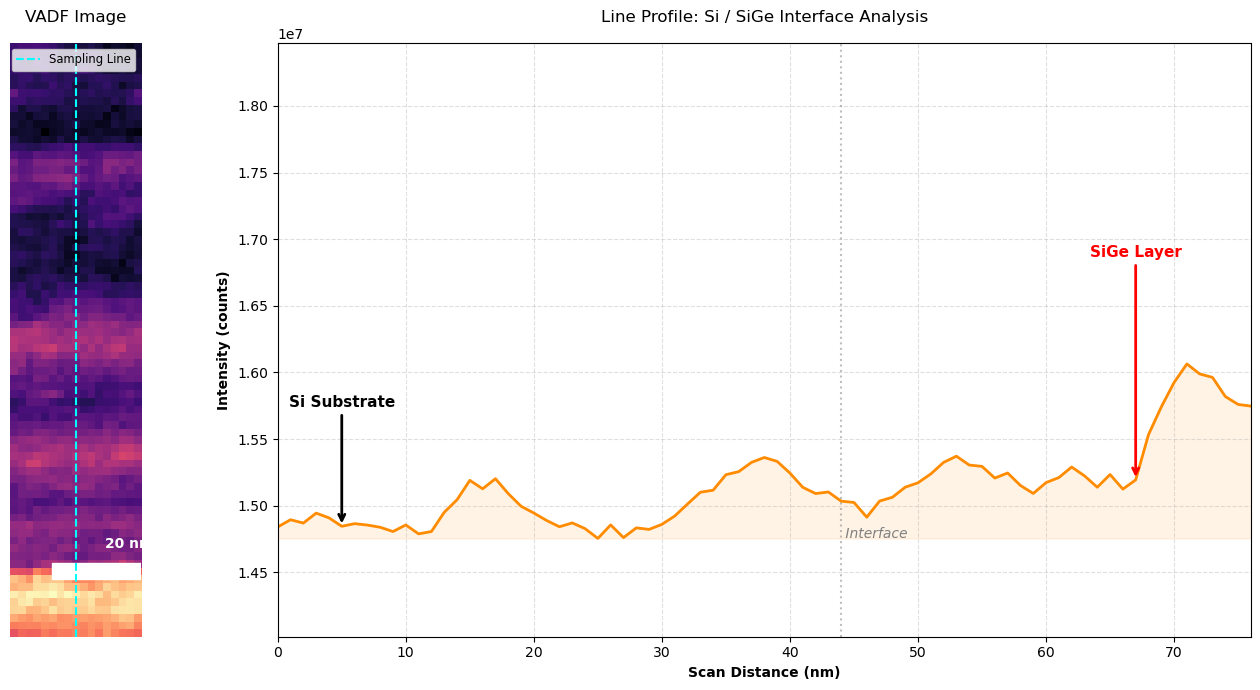

In [31]:
from matplotlib.patches import Rectangle


def task4_refined_visualization(adf_img, nav_step=1.0):
    # 1. Prepare Data
    ny, nx = adf_img.shape
    pixel_size = nav_step 
    center_col = nx // 2
    line_profile = adf_img[:, center_col]
    y_axis_nm = np.arange(ny) * pixel_size

    # 2. Setup Figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [1, 2.5]})
    plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

    # --- Left Plot: ADF Image with Scale Bar ---
    im = ax1.imshow(adf_img, cmap='magma', interpolation='nearest')
    ax1.axvline(center_col, color='cyan', linestyle='--', linewidth=1.5, label='Sampling Line')
    
    # Precise Scale Bar (20 nm)
    sb_nm = 20
    sb_px = sb_nm / pixel_size
    ax1.add_patch(Rectangle((5, ny-10), sb_px, 2, color='white'))
    ax1.text(5 + sb_px/2, ny-12, f'{sb_nm} nm', color='white', ha='center', fontweight='bold')
    
    ax1.set_title("VADF Image", pad=15)
    ax1.axis('off')
    ax1.legend(loc='upper right', frameon=True, fontsize='small')

    # --- Right Plot: Enhanced Line Profile ---
    ax2.plot(y_axis_nm, line_profile, color='#FF8C00', linewidth=2, label='Integrated Intensity')
    ax2.fill_between(y_axis_nm, line_profile, np.min(line_profile), color='#FF8C00', alpha=0.1)
    
    # 3. Improved Annotations (標註優化)
    # 找出強度變化最劇烈的地方（界面）
    interface_idx = np.argmax(np.abs(np.diff(line_profile))) 
    
    # Si Substrate 標註 (指向左側低強度區)
    ax2.annotate('Si Substrate', 
                 xy=(y_axis_nm[5], line_profile[5]), 
                 xytext=(y_axis_nm[5], np.max(line_profile)*0.98),
                 arrowprops=dict(arrowstyle='->', lw=2, color='black'),
                 ha='center', fontsize=11, fontweight='bold')

    # SiGe Layer 標註 (指向右側高強度區)
    ax2.annotate('SiGe Layer', 
                 xy=(y_axis_nm[-10], line_profile[-10]), 
                 xytext=(y_axis_nm[-10], np.max(line_profile)*1.05),
                 arrowprops=dict(arrowstyle='->', lw=2, color='red'),
                 ha='center', fontsize=11, color='red', fontweight='bold')

    # 界面分界線 (Interface marker)
    ax2.axvline(y_axis_nm[interface_idx], color='gray', linestyle=':', alpha=0.5)
    ax2.text(y_axis_nm[interface_idx], np.min(line_profile), ' Interface', color='gray', fontstyle='italic')

    # Style Adjustments
    ax2.set_xlabel("Scan Distance (nm)", fontweight='bold')
    ax2.set_ylabel("Intensity (counts)", fontweight='bold')
    ax2.set_title("Line Profile: Si / SiGe Interface Analysis", pad=15)
    ax2.grid(True, which='both', linestyle='--', alpha=0.4)
    ax2.set_xlim(0, np.max(y_axis_nm))
    
    # 增加 Y 軸餘裕以防標籤被切到
    ax2.set_ylim(np.min(line_profile)*0.95, np.max(line_profile)*1.15)

    plt.tight_layout()
    plt.show()

# 執行
task4_refined_visualization(adf_img)

Key figures exported to the 'final_outputs/' folder.
Checklist Item 1: COMPLETE.
